# Applied Statistics Tasks

**Linda Grealish**

***

## Table of contents
 * [Task 1](#task-1)
 * [Task 2](#task-2)
 * [Task 3](#task-3)
 * [Task 4](#task-4)


<a id="task-1"></a>
## Task 1

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea.
Six have the milk in first and the other six having tea in first.
A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it.
You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups.
Here you should assume that they have no special powers in figuring it out, that they are just guessing.
Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error.
Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.
Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [1]:
import math

In [2]:
# Number of cups in total
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6


In [3]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

In [4]:
# Define function to calculate number of possible combinations
def number_combinations(n, k):
  return math.comb(n, k)


In [5]:
total_ways = number_combinations(12, 6)
total_ways
print(f'The total number of combinations is {total_ways}')

The total number of combinations is 924


In [6]:
p_correct_selection = 1 / total_ways
p_correct_selection

0.0010822510822510823

In [7]:
print(f"Total number of ways to select 6 cups from 12: {total_ways}")
print(f"Probability of selecting the correct 6 cups: {p_correct_selection:.10f}")

Total number of ways to select 6 cups from 12: 924
Probability of selecting the correct 6 cups: 0.0010822511


In [8]:
# Probability of selecting exactly 6 correct cups (no errors)
p_exact_6_correct = 1 / total_ways

# Probability of selecting exactly 5 correct cups (1 error)
# Choose 5 correct from 6, and 1 incorrect from 6
ways_to_choose_5_correct = number_combinations(6, 5)
ways_to_choose_1_incorrect = number_combinations(6, 1)
p_exact_5_correct = (ways_to_choose_5_correct * ways_to_choose_1_incorrect) / total_ways

# Total probability of making at most 1 error
p_at_most_1_error = p_exact_6_correct + p_exact_5_correct

# Output the result
print(f"Probability of selecting exactly 6 correct cups (no errors): {p_exact_6_correct:.10f}")
print(f"Probability of selecting exactly 5 correct cups (1 error): {p_exact_5_correct:.10f}")
print(f"Total probability of making at most 1 error (0 or 1 error): {p_at_most_1_error:.10f}")


Probability of selecting exactly 6 correct cups (no errors): 0.0010822511
Probability of selecting exactly 5 correct cups (1 error): 0.0389610390
Total probability of making at most 1 error (0 or 1 error): 0.0400432900


In [9]:
# Probability of selecting exactly 6 correct cups (no errors)
p_exact_6_correct = 1 / total_ways

# Probability of selecting exactly 4 correct cups (2 error)
# Choose 4 correct from 6, and 2 incorrect from 6
ways_to_choose_4_correct = number_combinations(6, 4)
ways_to_choose_2_incorrect = number_combinations(6, 2)
p_exact_4_correct = (ways_to_choose_4_correct * ways_to_choose_2_incorrect) / total_ways

# Total probability of making at most 2 error
p_at_most_2_errors = p_exact_6_correct + p_exact_5_correct + p_exact_4_correct

# Output the result
print(f"Probability of selecting exactly 6 correct cups (no errors): {p_exact_6_correct:.10f}")
print(f"Probability of selecting exactly 5 correct cups (1 error): {p_exact_5_correct:.10f}")
print(f"Probability of selecting exactly 4 correct cups (2 errors): {p_exact_4_correct:.10f}")
print(f"Total probability of making at most 2 errors (0, 1 or 2 errors): {p_at_most_2_errors:.10f}")


Probability of selecting exactly 6 correct cups (no errors): 0.0010822511
Probability of selecting exactly 5 correct cups (1 error): 0.0389610390
Probability of selecting exactly 4 correct cups (2 errors): 0.2435064935
Total probability of making at most 2 errors (0, 1 or 2 errors): 0.2835497835


<a id="task-2"></a>
## Task 2

In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [11]:
# Define parameters
mean = 10.0
std_dev = 3.0
n = 100000

In [12]:
# Generate our random normal sample based on above parameters
sample = np.random.normal(mean, std_dev, n)

#Show
sample

array([13.62452505,  9.96799395,  9.51570639, ...,  5.34819541,
       10.92349546, 14.80307753])

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [21]:
# Run the Shapiro test on the generated sample
shapiro_test = stats.shapiro(sample)

print("Shapiro-Wilk Test Results:")
print(f"Statistic: {shapiro_test.statistic}")
print(f"p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test Results:
Statistic: 0.9999725222587585
p-value: 0.6876731514930725


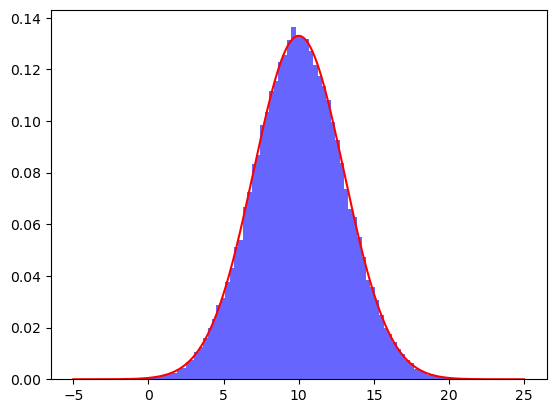

In [30]:
# Plot histogram of the generated sample
# fig, ax = plt.subplots()

plt.hist(sample, bins=100, density=True, alpha=0.6, color='b', label='Sample Histogram')
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 100000)
#x = np.linspace(-10,30, 100000)
pdf = stats.norm.pdf(x, loc=mean, scale=std_dev)
plt.plot(x, pdf, 'r', label='Normal Distribution PDF')


In [ ]:
fig, ax = plt.subplots()

stats.probplot(sample, dist='norm', plot = ax);


## References

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php#:~:text=If%20the%20Sig.,deviate%20from%20a%20normal%20distribution.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

https://www.kaggle.com/discussions/general/432129



<a id="task-3"></a>
## Task 3

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic based on this data set, using Python.
Compare it to the value given by `scipy.stats`.
Explain your work and list any sources used.

In [4]:
import numpy as np
import scipy.stats as stats


Formula for Paired T-Test
The t-statistic for a paired test is calculated as:

$$t = \frac{\bar{d}}{s_d / \sqrt{n}} $$

where:

\begin{align*}
\bar{d} & = \text{mean of the differences between paired samples} \\
s_d & = \text{standard deviation of the differences} \\
n & = \text{number of pairs}
\end{align*}


In [8]:
# Data for resting heart rates before and after the program
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

In [9]:
# Perform paired t-test to calculate the t-statistic and p-value

stats.ttest_ind(before, after)

Ttest_indResult(statistic=0.4740968275126808, pvalue=0.6411310132871086)

In [23]:
mean1, mean2 = np.mean(before), np.mean(after)

In [24]:
std1, std2 = np.std(before, ddof=1), np.std(after, ddof=1)

In [25]:
se1, se2 = stats.sem(before), stats.sem(after)

In [26]:
sed = np.sqrt(se1**2.0 + se2**2.0)

In [27]:
t_stat = (mean1 - mean2) / sed

t_stat

0.4740968275126808

In [22]:
stats.ttest_ind(before, after)

Ttest_indResult(statistic=0.4740968275126808, pvalue=0.6411310132871086)

In [28]:
stats.ttest_rel(before, after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

## References

https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

https://www.geeksforgeeks.org/scipy-stats-sem-function-python/


<a id="task-4"></a>
## Task 4

In this test we will estimate the probability of committing a type II error in specific circumstances.
To begin, create a variable called `no_type_ii` and set it to `0`.

Now use a loop to perform the following test 10,000 times.

1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

Summarize and explain your results.